In [53]:
from PIL import Image
def remove_bottom_lines(img):
    width, height = img.size
    box = (0, 0, width, height - 20) 
    cropped_img = img.crop(box)
    return cropped_img

In [66]:
import torchvision.transforms as T
import torch

torch.manual_seed(30)
transform=T.Compose([
    T.Lambda(remove_bottom_lines),
    T.Grayscale(num_output_channels=1),
    T.ToTensor(),
    T.Normalize([0.5],[0.5])
])

In [75]:
from torchvision.datasets import *

test_set=FGVCAircraft(root=".", split="test", download=True, transform=transform, annotation_level="variant")
train_set=FGVCAircraft(root=".", split="train", download=True, transform=transform, annotation_level="variant")
val_set=FGVCAircraft(root=".", split="val", download=True, transform=remove_bottom_lines, annotation_level="variant")


In [76]:
with open('./fgvc-aircraft-2013b/data/variants.txt', 'r') as file:
    variants = file.read().splitlines()

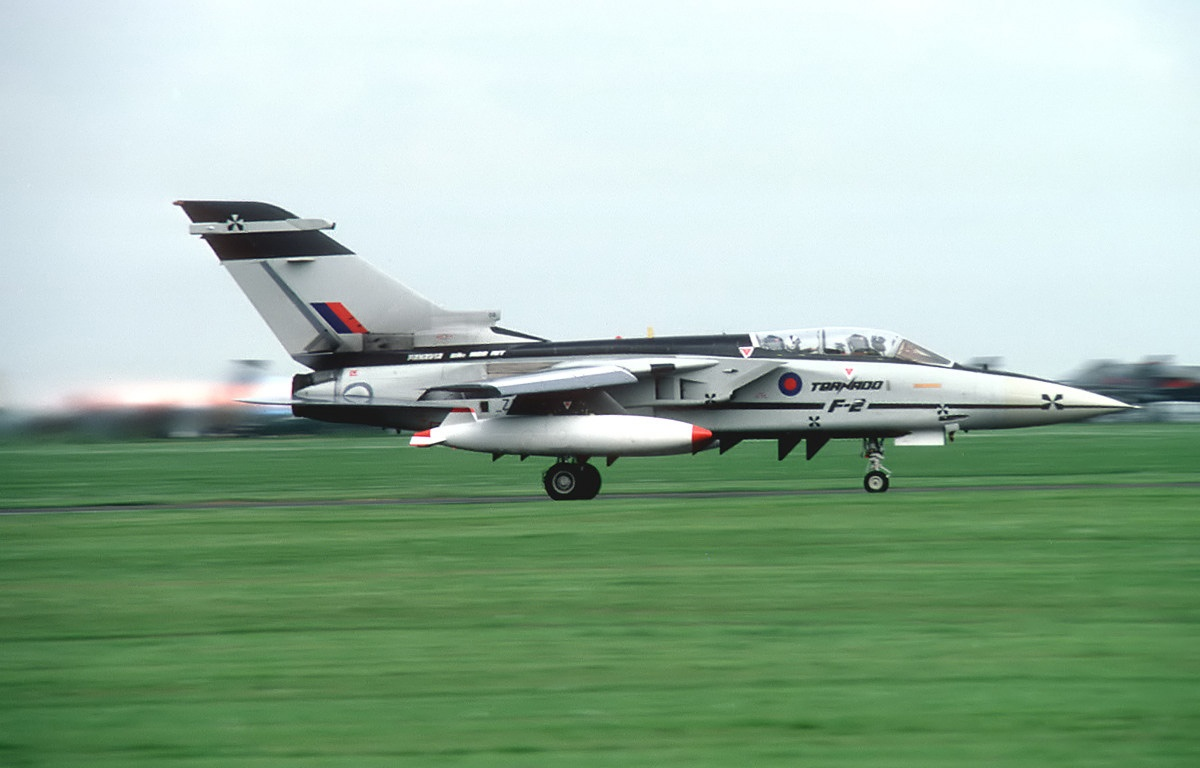

In [77]:
val_set[3200][0]

In [78]:
binary_train_set=[x for x in train_set if x[1] in [72,96]]
binary_test_set=[x for x in test_set if x[1] in [72,96]]

In [79]:
binary_train_set[36][0]

tensor([[[0.9059, 0.9059, 0.9137,  ..., 0.8588, 0.8588, 0.8588],
         [0.9059, 0.9059, 0.9059,  ..., 0.8588, 0.8510, 0.8588],
         [0.9059, 0.8980, 0.8980,  ..., 0.8510, 0.8431, 0.8431],
         ...,
         [0.1451, 0.1059, 0.0745,  ..., 0.1373, 0.0667, 0.0039],
         [0.1765, 0.0980, 0.0510,  ..., 0.0980, 0.0353, 0.0118],
         [0.1922, 0.1373, 0.0902,  ..., 0.0667, 0.0353, 0.0588]]])